## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_excel("titanic.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [4]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [5]:
df.drop(columns=["cabin", "boat", "body", "home.dest"], inplace = True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [6]:
print(df["embarked"].value_counts())

S    914
C    270
Q    123
Name: embarked, dtype: int64


In [7]:
df["embarked"].fillna("S", inplace = True)

In [8]:
print(df["fare"].mean())

33.29547928134572


In [9]:
df["fare"].fillna(33.29547928134572, inplace = True)

In [10]:
df.dropna(subset=["age"], inplace = True)

In [11]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [12]:
df["pclass"].replace([1, 2, 3], ["1st Class", "2nd Class", "3rd Class"], inplace = True)

In [13]:
df["survived"].replace([0, 1], ["Died", "Survived"], inplace = True)

In [14]:
df["embarked"].replace(["C", "Q", "S"], ["Cherbourg", "Queenstown", "Southampton"], inplace = True)

In [15]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1st Class,Survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton
1,1st Class,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton
2,1st Class,Died,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton
3,1st Class,Died,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton
4,1st Class,Died,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton


In [16]:
df["Titanic Passenger"] = 1

In [17]:
df["Family Size"] = df["sibsp"] + df["parch"]

In [18]:
df["Traveling Alone"] = np.where(df["Family Size"] == 0, "Alone", "With Family")

In [19]:
df["Has Caregiver"] = np.where((df["Family Size"] > 0) & (df["age"] < 13), "Has Caregiver", "No Caregiver")

In [20]:
df["Crew"] = np.where(df["fare"] == 0, "Crew", "Passenger")

In [21]:
bins = [0, 2, 13, 18, 65, 150]
bin_names = ["Infant", "Child", "Teen", "Adult", "Senior"]

df["Age Group"] = pd.cut(df["age"], bins, labels=bin_names)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Traveling Alone,Has Caregiver,Crew,Age Group
0,1st Class,Survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,Alone,No Caregiver,Passenger,Adult
1,1st Class,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,With Family,Has Caregiver,Passenger,Infant
2,1st Class,Died,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,With Family,Has Caregiver,Passenger,Infant
3,1st Class,Died,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,With Family,No Caregiver,Passenger,Adult
4,1st Class,Died,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,With Family,No Caregiver,Passenger,Adult


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [22]:
df[['pclass']].value_counts()

pclass   
3rd Class    501
1st Class    284
2nd Class    261
dtype: int64

In [23]:
df[['survived']].value_counts()

survived
Died        619
Survived    427
dtype: int64

In [24]:
df[['sex']].value_counts()

sex   
male      658
female    388
dtype: int64

In [25]:
df[['embarked']].value_counts()

embarked   
Southampton    784
Cherbourg      212
Queenstown      50
dtype: int64

In [26]:
df[['Traveling Alone']].value_counts()

Traveling Alone
Alone              590
With Family        456
dtype: int64

In [27]:
df[['Has Caregiver']].value_counts()

Has Caregiver
No Caregiver     955
Has Caregiver     91
dtype: int64

In [28]:
df[['Crew']].value_counts()

Crew     
Passenger    1038
Crew            8
dtype: int64

In [29]:
df[['Age Group']].value_counts()

Age Group
Adult        843
Teen          94
Child         65
Infant        34
Senior        10
dtype: int64

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [30]:
df.describe()

,age,sibsp,parch,fare,Titanic Passenger,Family Size
count,1046.000000,1046.000000,1046.00000,1046.000000,1046.0,1046.000000
mean,29.881135,0.502868,0.42065,36.682839,1.0,0.923518
std,14.413500,0.912167,0.83975,55.705959,0.0,1.452891
min,0.166700,0.000000,0.00000,0.000000,1.0,0.000000
25%,21.000000,0.000000,0.00000,8.050000,1.0,0.000000
50%,28.000000,0.000000,0.00000,15.800000,1.0,0.000000
75%,39.000000,1.000000,1.00000,35.500000,1.0,1.000000
max,80.000000,8.000000,6.00000,512.329200,1.0,10.000000


In [31]:
df.mode()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Traveling Alone,Has Caregiver,Crew,Age Group
0,3rd Class,Died,"Connolly, Miss. Kate",male,24.0,0.0,0.0,CA 2144,13.0,Southampton,1.0,0.0,Alone,No Caregiver,Passenger,Adult
1,NaN,NaN,"Kelly, Mr. James",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [32]:
pd.crosstab(df["pclass"], df["survived"], margins = True)

survived,Died,Survived,All
pclass,,,
1st Class,103,181,284
2nd Class,146,115,261
3rd Class,370,131,501
All,619,427,1046


In [33]:
pd.crosstab(df["sex"], df["survived"], margins = True)

survived,Died,Survived,All
sex,,,
female,96,292,388
male,523,135,658
All,619,427,1046


In [34]:
df["age"].groupby(df["survived"]).mean()

survived
Died        30.545369
Survived    28.918228
Name: age, dtype: float64

In [35]:
pd.crosstab(df["Age Group"], df["survived"], margins = True)

survived,Died,Survived,All
Age Group,,,
Infant,13,21,34
Child,29,36,65
Teen,56,38,94
Adult,513,330,843
Senior,8,2,10
All,619,427,1046


In [36]:
df["Family Size"].groupby(df["survived"]).mean()

survived
Died        0.852989
Survived    1.025761
Name: Family Size, dtype: float64

In [37]:
pd.crosstab(df["Traveling Alone"], df["survived"], margins = True)

survived,Died,Survived,All
Traveling Alone,,,
Alone,402,188,590
With Family,217,239,456
All,619,427,1046


In [38]:
pd.crosstab(df["Crew"], df["survived"], margins = True)

survived,Died,Survived,All
Crew,,,
Crew,6,2,8
Passenger,613,425,1038
All,619,427,1046


In [39]:
pd.crosstab(df["Has Caregiver"], df["survived"], margins = True)

survived,Died,Survived,All
Has Caregiver,,,
Has Caregiver,39,52,91
No Caregiver,580,375,955
All,619,427,1046


In [40]:
df["fare"].groupby(df["survived"]).mean()

survived
Died        25.161913
Survived    53.384134
Name: fare, dtype: float64

In [41]:
pd.crosstab(df["embarked"], df["survived"], margins = True)

survived,Died,Survived,All
embarked,,,
Cherbourg,80,132,212
Queenstown,37,13,50
Southampton,502,282,784
All,619,427,1046


### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

Text(0.5, 1.0, 'survival by passenger class')

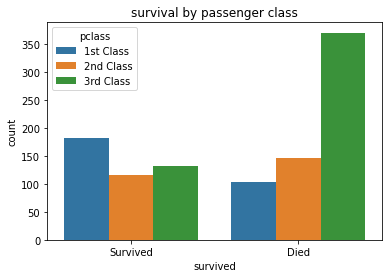

In [42]:
sns.countplot(data = df, x = "survived", hue = "pclass")
plt.title('survival by passenger class')

Text(0.5, 1.0, 'survival by sex')

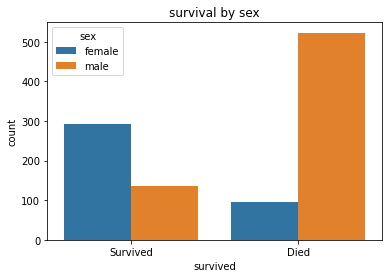

In [43]:
sns.countplot(data = df, x = "survived", hue = "sex")
plt.title('survival by sex')

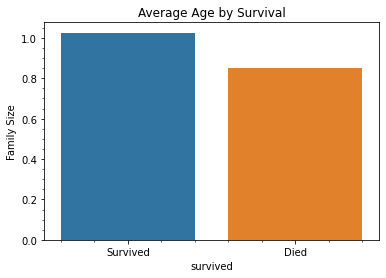

In [44]:
sns.barplot(data = df, x = "survived", y = "Family Size", ci = None)

plt.title('Average Age by Survival')
plt.minorticks_on() 

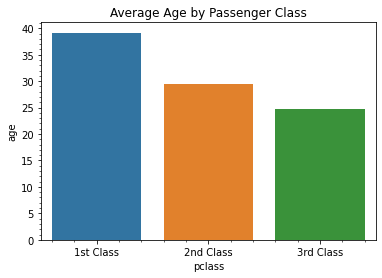

In [45]:
sns.barplot(data = df, x = "pclass", y = "age", ci = None)

plt.title('Average Age by Passenger Class')
plt.minorticks_on() 

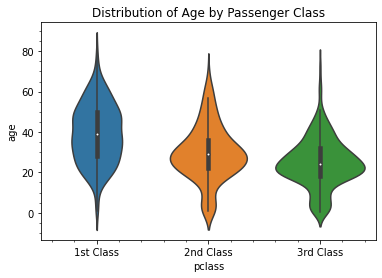

In [46]:
sns.violinplot(x = df["pclass"], y = df["age"])
plt.title('Distribution of Age by Passenger Class')
plt.minorticks_on() 